# 2D Embedding of High Dimensional Instances

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [2]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [3]:
import time
timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
print timestamp

2017_07_10_11_10_59


In [4]:
root_dir = '/Users/costa/work/COLLABORATIONS/FREIBURG/dominic_gruen/single_cell/' 
root_dir = '/home/fc334/Sync/COLLABORATIONS/FREIBURG/dominic_gruen/single_cell/' 
raw_data_dir = os.path.join(root_dir, 'data/2015-12-11')

In [5]:
# add the 'src' directory as one where we can import modules
src_dir = '/Users/costa/ResilioSync/Sync/Projects/GraphEmbed'
src_dir = '/home/fc334/Sync/Projects/GraphEmbed'
sys.path.append(src_dir)

# Parameters Setup

In [6]:
import os
def make_file_names(name, suffix):
    target_fname = os.path.join(raw_data_dir, name,'partition' + suffix)
    data_fname = os.path.join(raw_data_dir, name,'fdata' + suffix)
    tsne_fname = os.path.join(raw_data_dir, name,'tsne' + suffix)
    return target_fname, data_fname, tsne_fname

In [7]:
name = 'um'
suffix = '_UM.csv'

In [8]:
name = 'hippocampus'
suffix = '_hippocampus.csv'

In [9]:
name = 'myeloid'
suffix = '_my.csv'

In [10]:
name = 'bone_marrow'
suffix = '_BMJhscC.csv'

In [11]:
name = 'pancrhcl'
suffix = '_PANCRHCL.csv'

In [12]:
name = 'intestine'
suffix = '_ADULT.csv'

In [13]:
target_fname, data_fname, tsne_fname = make_file_names(name, suffix)

In [14]:
out_data_dir = os.path.join(root_dir, 'report/'+ timestamp + '_' + name)
import os
if not os.path.exists(out_data_dir): os.mkdir(out_data_dir)

In [15]:
# configure logger
from eden.util import configure_logging
import logging
logger = logging.getLogger()
log_fname = os.path.join(out_data_dir, 'log.txt')
configure_logging(logger, verbosity=2, filename=log_fname)

### Data acquisition and pre-processing

In [16]:
%%time
from graph_embed import pre_process
data_matrix, y, target_dict = pre_process(data_fname,
                                          target_fname,
                                          correlation_transformation=True,
                                          normalization=True,
                                          feature_selection=False,
                                          min_threshold=5,
                                          max_threshold=400,
                                          random_state=1)

Reading data from file: /home/fc334/Sync/COLLABORATIONS/FREIBURG/dominic_gruen/single_cell/data/2015-12-11/intestine/fdata_ADULT.csv
#instances:480  #features:1421
Reading data from file: /home/fc334/Sync/COLLABORATIONS/FREIBURG/dominic_gruen/single_cell/data/2015-12-11/intestine/partition_ADULT.csv
read 480 values 
original num classes: 27
selected 19 classes with more than 5 instances
num instances:462  num features:1421
Normalization
Correlation coefficient transformation
num instances:462  num features:462
CPU times: user 1.55 s, sys: 152 ms, total: 1.7 s
Wall time: 554 ms


In [17]:
from display import interactive_widget

w = interactive_widget(data_matrix, target_dict, y)

/home/fc334/miniconda2/envs/eden_env/lib/python2.7/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


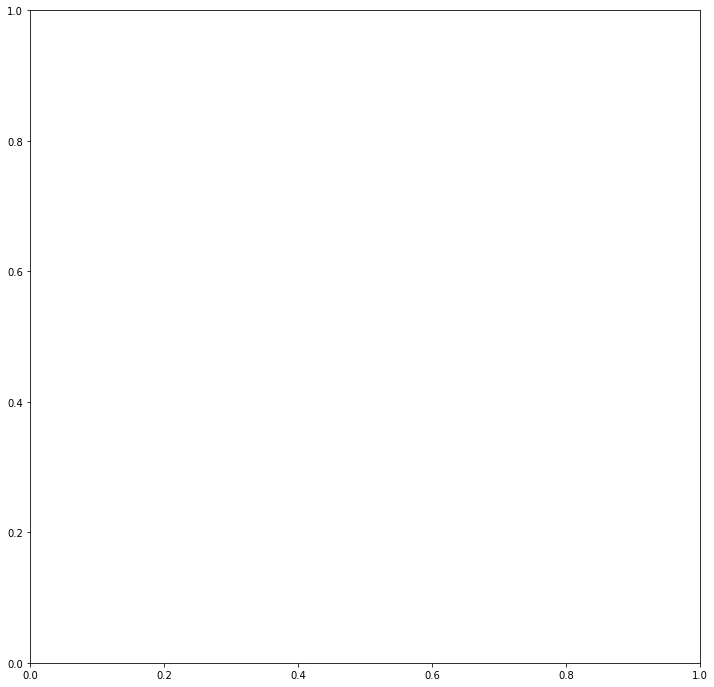

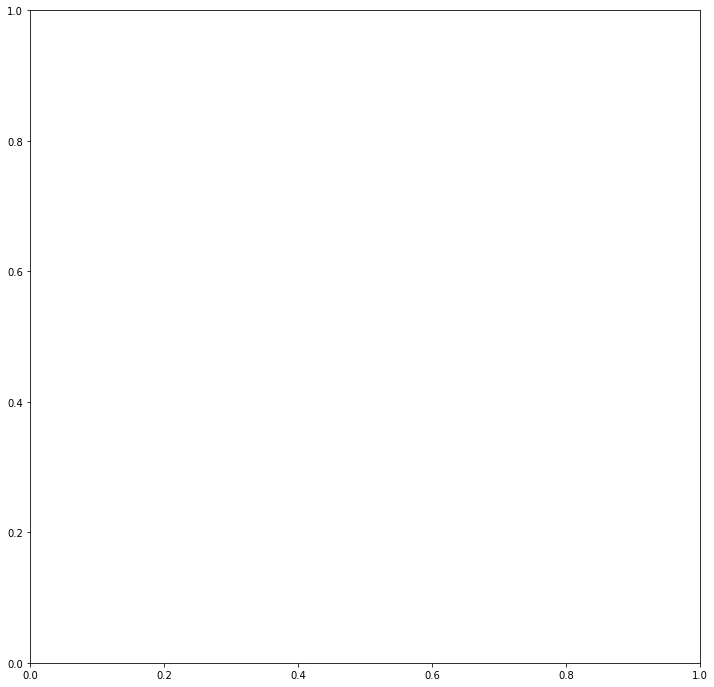

In [18]:
from IPython.display import display
display(w)

---